<center>
    <h1> Math761: HW 3 <br>
   Inverse Transformation Method </h1>
    </center>


### Exercise 1


Suppose X has density $$f_{x}(s) = 2s\textbf{1}\{s \in [0,1] \}$$.

#### Generate 1000 random variables from X's distribution. Then plot them in a histogram and add a line of the target density for comparison. 

If  X has density $f_{x}(s) = 2s\textbf{1}\{s \in [0,1] \}$, then we can use the inverse transformation method to sample from x. To do this:

1. find CDF F(x):

$$ F(x) = \int_0 ^x f(t)dt = \int_0 ^x 2t dt = t^2 |_0 ^x = x^2$$

So, $$ F(x) = x^2$$

2. find inverse CDF $F^{-1}(u)$

$$ y = x^2$$

$$ \sqrt{y} = x$$

$$F^{-1}(u) = \sqrt{u}$$

3. sample from the uniform

4. plug into inverse



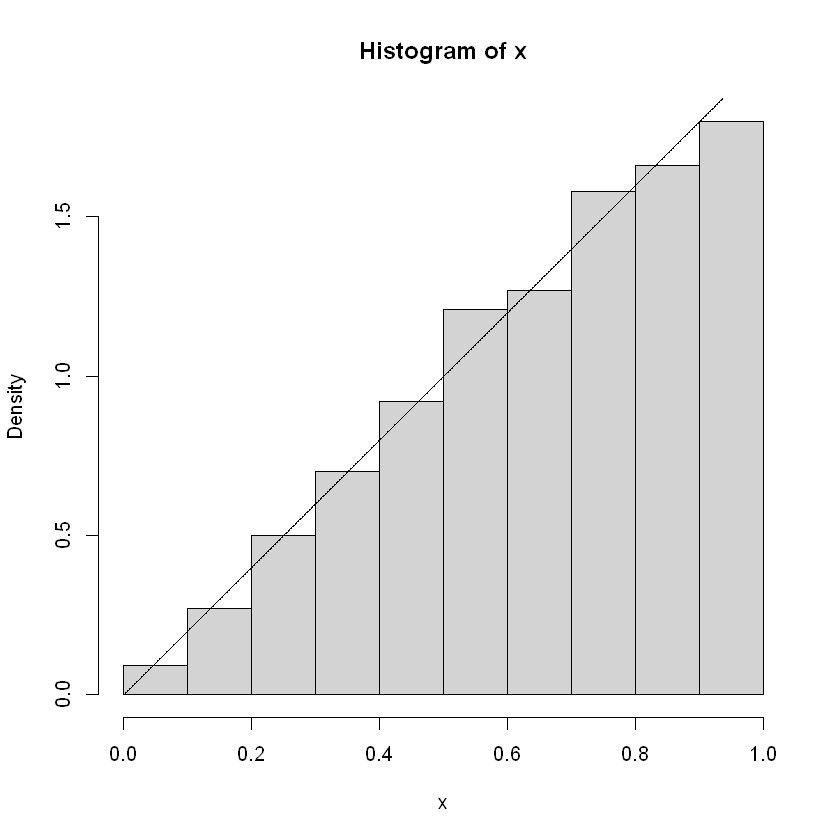

In [15]:
u <- runif(1000) # sample from uniform
x <- sqrt(u) # plug into the inverse
hist(x, prob = TRUE, breaks=10) # plot hist
x_in <- seq(from = 0, to = 1, length.out = 1000) # plot line
lines(x_in, 2 * x_in) # plot line

### Exercise 2

We proved in class that the inverse probability method works when we define the inverse of y=f(x) as

$$x =  inf \{t: f(t)\geq y\}$$

This is actually a "pseudo inverse".

If f(x) is a continuous function, it actually has a real inverse, and the proof is a little simpler. Please watch this video https://www.youtube.com/watch?v=irheiVXJRm8 that shows how this proof works.

#### a) Try to understand it and then re-write the proof in your own words, as if you were trying to explain it to another student. If you want to handwrite your proof, just make sure to submit it as part of your assignment (along with this file).

The goal is to prove the inverse transform for the continuous case, which is stated in the following proposition. 

Proposition: Let $F:R\to(0,1)$ be an invertible CDF. Hence, we know that there exists an $F^{-1}:(0,1)\to R$ such that $F^{-1}(F(x))=x$ and $F(F^{-1}(u))=u$. If $U\sim Unif(0,1)$, then $F^{-1}(u)\sim F$ and $F^{-1}(u)$ has the CDF of $F. 

Essentially in the proposition above we are claiming that if we have a CDF that we know is invertible, then applying its inverse to samples from the unfirom distribution results in the CDF itself. That is, we end up sampling $x$ from the CDF $F(x)$ when we sample $U\sim Unif(0,1)$ and substitute $F^{-1}(u)$. 

Proof:
Let $F:R\to(0,1)$ be an invertible CDF. Let $x,y \in R$ and $a,b \in (0,1)$. Since $F$ has an inverse, we know the following properties hold:

- $x\leq y \Rightarrow F(x) \leq F(y)$ since F is non-decreasing
- $x<y \Rightarrow F(x) < F(y)$ since F is 1:1
- $a \leq b \Rightarrow F^{-1}(a) \leq F^{-1}(b)$ since $F^{-1}$ is non-decreasing, follows from the first bullet point

From these properties, it follows that:
- $F^{-1}(a) \leq x \iff a\leq F(x)$ 

In other words, the inverse CDF at a point a is less than or equal to x if and only if the CDF at x is greater than or equal to a. So essentially if the CDF at X is greater or equal to some value a, then the inverse CDF at a is less than or equal to x. This ensures that there are no values of the CDF at x where the inverse CDF is greater than x. 

Now, we recall that the CDF of a uniform random variable, $H(x)$, is such that
 $$H(X) = \begin{cases}  0 ; \text{if  } x \leq 0 \\ x ; \text{if  } 0<x<1 \\ 1;  \text{if } 1 \leq x \end{cases}$$

Our goal is to show that $F^{-1}(u)\sim F$. We can start with the definition of $F^{-1}(u)$, which is the probability:

$$P(F^{-1}(u)\leq x)$$

But we know from the properties above that $F^{-1}(a) \leq x \iff a\leq F(x)$, so this is then equal to:

$$P(u\leq F(x))$$

At this point, we know $u$ is a uniform variable, so this is equal to the CDF of a uniform variable, $H(x)$ above:

$$H(F(x))$$

Since $F(x) \in (0,1)$, we get simply $F(x)$. Hence we've shown that:

$$P(F^{-1}(u)\leq x) = F(x)$$ 

So $F^{-1}(u)\sim F$ and the inverse transformation of the CDF at $u$ is sampling from the CDF.


#### b) Also summarize what you think are the main differences between the proof we did in class and the proof you wrote up in part a. This can have many answers, but mostly I just want you to think carefully about the two proofs.

In the proof above, one of the main differnces from the proof we did in class is the assumption that the CDF $F(x)$ has an inverse. Since we assume $F(x)$ has an inverse, we can directly apply a number of properties that derive from the inverse existing. Additionally, the proof that we did in class required proving the if and only if statement ($F^{-1}(a)\leq x \iff a\leq F(x)$), while the proof above could easily show it is true based on the properties of the inverse. Essentially the pseudo-inverse proof involved proving the defined inverse allows these conditions to hold, while these conditions come naturally when assuming the inverse exists.




### Exercise 3 (from Rizzo text)

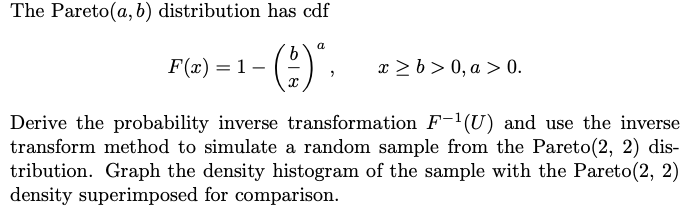




Deriving $F^{-1}(U)$:

$$F(x) = 1 - (\frac{b}{x})^a,        x\geq b>0, a>0$$ 

$$y = 1 - (\frac{b}{x})^a$$

$$1-y =  (\frac{b}{x})^a$$

$$(1-y)^{1/a} = (\frac{b}{x})$$

$$ x = \frac{b}{(1-y)^{1/a}}$$

Hence:

$$ F^{-1}(U) = \frac{b}{(1-U)^{1/a}},    F^{-1}(U)\geq b>0, a>0 $$

Then for Pareto(2,2) the inverse CDF is:

$$ F^{-1}(U) = \frac{2}{(1-U)^{1/2}},    F^{-1}(U)\geq b>0, a>0$$

Now that we have the inverse CDF, we can generate numbers from the uniform distribution and substitute them into $$ F^{-1}(U)$$ to sample from the Pareto(2,2).

Also, the density for Pareto(2,2) can be derived for superimposing:

$$F'(x) = 0-a(\frac{b}{x})^{a-1}*(\frac{-b}{x^2}) = \frac{a(\frac{b}{x})^{a}}{x} $$

$$f(x) = \frac{2(\frac{2}{x})^{2}}{x} = \frac{2\frac{4}{x^2}}{x} = \frac{8}{x^3}$$

$$ f(x) = \frac{8}{x^3}$$

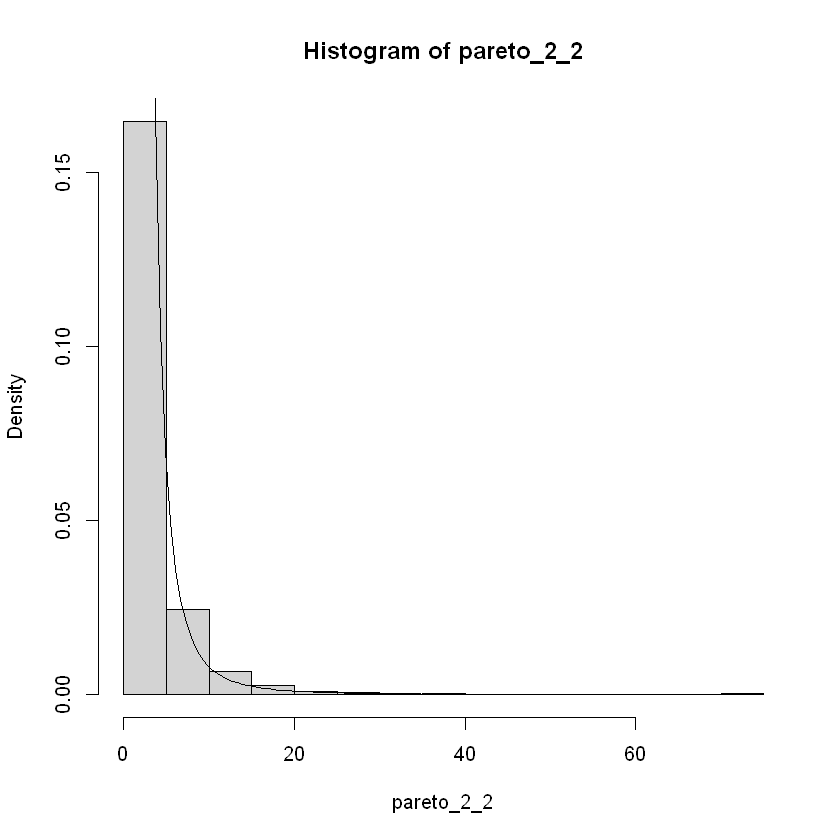

In [10]:
n = 1000 
u = runif(n) # sample from uniform
pareto_2_2 = 2/((1-u)^0.5) # pareto function
hist(pareto_2_2, prob=TRUE) # pareto generated from inverse transformation
x = seq(from=0, to=60, length=100) 
lines(x, 8/(x^3)) # pareto density

### Exercise 4 (from Rizzo text)

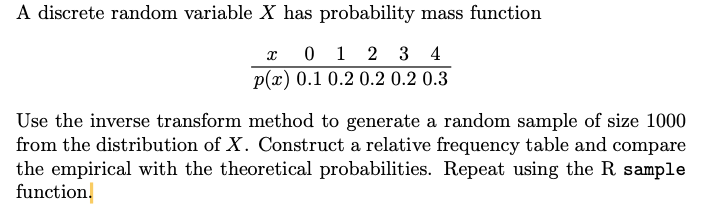

steps for inverse:

1. Find CDF

$$F(x) = \begin{cases}
0.1 & 0\leq x<1\\
0.3 & 1\leq x<2\\ 
0.5 & 2\leq x<3\\
0.7 & 3\leq x<4\\
1 & 4\leq x\\
\end{cases}
$$

2. Find inverse CDF 
$$F^{-1}(u) = \begin{cases}
0 & 0 \leq u \leq 0.1\\
1 & 0.1 < u \leq 0.3\\ 
2 & 0.3 < u \leq 0.5\\
3 & 0.5 < u \leq 0.7\\
4 & 0.7 < u \leq 1\\
\end{cases}
$$

3. Simulate

4. Get X

Using the inverse transform method:

results show that the sample is close to the given distribution, though there is some variation. In particular, 0 and 1 are over sampled where as 2,3, and 4 are undersampled in the simulation when compared to the theoretical.

In [11]:
n = 1000
u = runif(n)
results = rep(NA, n)
for (i in 1:n) {
   if (u[i] <= 0.1){
      results[i] = 0
    }
    else if ((0.1 < u[i]) & (u[i]<= 0.3)){
       results[i] = 1
    } 
    else if ((0.3 < u[i] ) & (u[i]<= 0.5)) {
       results[i] = 2
    } 
    else if ((0.5 < u[i]) & (u[i] <= 0.7)) {
       results[i] = 3
    }
    else if ((0.7 < u[i]) & (u[i] <= 1)) {
       results[i] = 4
    } 
}

In [18]:
data.frame(rbind(table(results),table(results)/n, c(0.1, 0.2, 0.2, 0.2, 0.3)), row.names=c("frequency", "relative frequency", "theoretical frequency"))

,X0,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
frequency,107.000,217.000,187.000,194.000,295.000
relative frequency,0.107,0.217,0.187,0.194,0.295
theoretical frequency,0.100,0.200,0.200,0.200,0.300


Using the sample function:

Again, results are close to the theoretical distribution, though with this method 0 and 2 were slightly over sampled when compared to the theoretical distribution.

In [19]:
results = sample(c(0,1,2,3,4), n, replace = TRUE, prob = c(0.1, 0.2, 0.2, 0.2, 0.3))
data.frame(rbind(table(results),table(results)/n, c(0.1, 0.2, 0.2, 0.2, 0.3)), row.names=c("frequency", "relative frequency", "theoretical frequency"))

,X0,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
frequency,106.000,189.000,219.000,197.000,289.000
relative frequency,0.106,0.189,0.219,0.197,0.289
theoretical frequency,0.100,0.200,0.200,0.200,0.300
